# Importing Libraries

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

# PART A: METROPOLIS ALGORITHM

    Unnormalized target density for standard normal N(0,1):
    π(x) ∝ exp(-x^2 / 2)
    We don't need the normalizing constant 1/sqrt(2π) for Metropolis.

        Simple Metropolis sampler for a 1D target distribution.
    
    Args:
        num_samples: total number of samples to return (after burn-in)
        proposal_std: standard deviation of the normal proposal q(x'|x) = N(x, proposal_std^2)
        initial_state: starting point of the Markov chain
        burn_in: number of initial samples to discard

    Returns:
        samples: numpy array of size num_samples (post burn-in)
        acceptance_rate: fraction of proposed moves that were accepted

In [7]:
def target_density(x):
    return math.exp(-0.5 * x * x)

def metropolis_sampling(
    num_samples=10000,
    proposal_std=1.0,
    initial_state=0.0,
    burn_in=1000
):
    total_iterations = num_samples + burn_in
    samples = np.zeros(total_iterations)
    samples[0] = initial_state

    accepted = 0

    for t in range(1, total_iterations):
        current = samples[t - 1]
        # Propose a new state from N(current, proposal_std^2)
        proposal = np.random.normal(current, proposal_std)

        # Compute acceptance probability alpha = min(1, π(proposal) / π(current))
        p_current = target_density(current)
        p_proposal = target_density(proposal)

        alpha = min(1.0, p_proposal / p_current)

        # Accept or reject
        u = np.random.rand()
        if u < alpha:
            samples[t] = proposal
            accepted += 1
        else:
            samples[t] = current

    final_samples = samples[burn_in:]
    acceptance_rate = accepted / total_iterations

    return final_samples, acceptance_rate








  # PART B: DETERMINISTIC MODEL (LOGISTIC GROWTH)

    Deterministic (analytical) model for standard normal N(0,1):
    - Mean = 0
    - Variance = 1

In [8]:
def deterministic_normal_stats():

    true_mean = 0.0
    true_variance = 1.0
    return true_mean, true_variance

## MAIN: Run both & Compare

========== PART A: Metropolis (Monte Carlo) ==========
Number of samples (after burn-in): 20000
Acceptance rate: 0.7074
Estimated mean (MC):      0.0124
Estimated variance (MC):  0.9900

========== PART B: Deterministic Model ==========
True mean (analytical):     0.0000
True variance (analytical): 1.0000

========== COMPARISON ==========
Mean error       = 0.0124
Variance error   = 0.0100


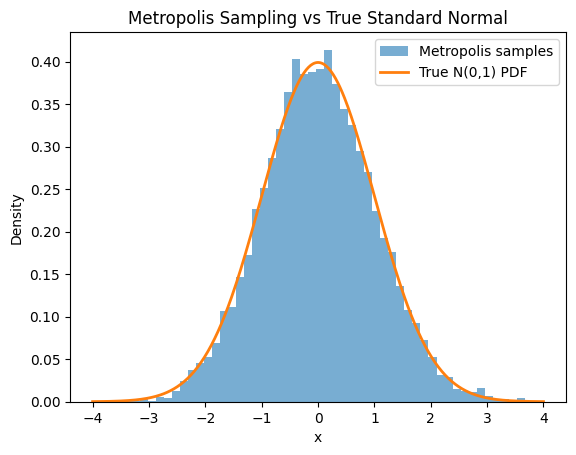

In [9]:
if __name__ == "__main__":
    # ---- Run Metropolis (PART A) ----
    num_samples = 20000
    proposal_std = 1.0
    burn_in = 2000

    samples, acc_rate = metropolis_sampling(
        num_samples=num_samples,
        proposal_std=proposal_std,
        initial_state=0.0,
        burn_in=burn_in
    )

    mc_mean = np.mean(samples)
    mc_variance = np.var(samples)

    # ---- Deterministic model (PART B) ----
    true_mean, true_variance = deterministic_normal_stats()

    # ---- Comparison ----
    print("========== PART A: Metropolis (Monte Carlo) ==========")
    print(f"Number of samples (after burn-in): {len(samples)}")
    print(f"Acceptance rate: {acc_rate:.4f}")
    print(f"Estimated mean (MC):      {mc_mean:.4f}")
    print(f"Estimated variance (MC):  {mc_variance:.4f}")

    print("\n========== PART B: Deterministic Model ==========")
    print(f"True mean (analytical):     {true_mean:.4f}")
    print(f"True variance (analytical): {true_variance:.4f}")

    print("\n========== COMPARISON ==========")
    print(f"Mean error       = {abs(mc_mean - true_mean):.4f}")
    print(f"Variance error   = {abs(mc_variance - true_variance):.4f}")

    # Optional: visualize to see how close it is
    plt.figure()
    plt.hist(samples, bins=50, density=True, alpha=0.6, label="Metropolis samples")

    # Plot true standard normal PDF for comparison
    xs = np.linspace(-4, 4, 400)
    normal_pdf = (1.0 / math.sqrt(2 * math.pi)) * np.exp(-0.5 * xs * xs)
    plt.plot(xs, normal_pdf, linewidth=2, label="True N(0,1) PDF")

    plt.title("Metropolis Sampling vs True Standard Normal")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


The Metropolis algorithm successfully approximates the target standard normal distribution.
The estimated mean and variance obtained from Monte Carlo sampling are very close to the deterministic analytical values.
Minor errors arise due to the stochastic nature of Monte Carlo methods and finite sample size.
As the number of samples increases, the Monte Carlo estimates converge to the deterministic results, validating the correctness of the implementation.